<a href="https://colab.research.google.com/github/mmcuri/ds_handson/blob/master/Violence_on_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Violence on Rio de Janeiro City

Rio de Janeiro is one of Brazil's most violent states and vast areas are under the control of criminals, many of them linked to powerful drug-trafficking gangs.

## The Data

Rio de Janeiro state governament publishes on a monthly basis the time series of security statistics on the region thoughout the portal [ISP Dados Abertos](http://www.ispdados.rj.gov.br). The complete dataset data can be downloaded from this [link](http://www.ispdados.rj.gov.br/estatistica.html).

These official records started to be tracked and maintaned  since 1991, after that more variables started to be collected, so we will notice many `null` values which will require our attention depending on the data we will be analyzing.  


### *Data Dictionary*

We are going to focus on the variables which will be used on this analysis.
The complete data dictonary can be found on [ISP Dados Abertos RJ](http://www.ispdados.rj.gov.br/Arquivos/DicionarioVariaveisDOMensalEstadoDesde1991.xlsx).

*   `ano` - Occurrence reporting year
*   `mes` - Occurrence reporting month
*   `hom_por_interv_policial`- Death by state agent intervention






### *Importing the Data and Libraries*


In [180]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

## Getting Started

Before jumping into the exploratory data analysis, let's answer a few questions to familiarize ourserlves with the *dataset* we will be studying.

#### *Dataframe size and info*

In [198]:
print('Dataset dimensions',
      '\n# Attributes: ', df.shape[1], 
      '\n# Entries: ', df.shape[0],'\n')

print(df.info())

Dataset dimensions 
# Attributes:  59 
# Entries:  353 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353 entries, 1991-01-01 to 2020-05-01
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ano                         353 non-null    int64         
 1   mes                         353 non-null    int64         
 2   hom_doloso                  353 non-null    int64         
 3   lesao_corp_morte            353 non-null    object        
 4   latrocinio                  353 non-null    int64         
 5   hom_por_interv_policial     353 non-null    object        
 6   letalidade_violenta         353 non-null    int64         
 7   tentat_hom                  353 non-null    int64         
 8   lesao_corp_dolosa           353 non-null    int64         
 9   estupro                     353 non-null    object        
 10  hom_culposo                 353 non-null    ob

#### *What are the attributes and their data types?*

Many attributes got imported by Pandas as `object` data type. The reason for that is because some variables that have a bunch of not populated entries were imported as `string`, with a blank space.

In [183]:
df.dtypes

ano                            int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_comercio                 int64
roubo_residencia               int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_transeunte               int64
roubo_em_coletivo              int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_celular                 object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
total_roubos                   int64
furto_veiculos                 int64
f

#### *Showing up some rows*

By displaying first entries of the dataset we notice that it the `null` values got imported as blank spaces. This can hinder the data analysis and have to be treated.

In [184]:
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,,15,,672,162,3051,,,,350,188,1174,63,967,381,37,,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,1348,1174,63,,3
1,1991,2,732,,17,,749,175,3421,,,,357,171,1097,64,963,432,35,,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,1395,1097,64,,3
2,1991,3,713,,25,,738,216,3613,,,,443,191,1265,71,963,422,43,,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,1385,1265,71,,3
3,1991,4,634,,20,,654,200,3211,,,,425,199,1415,81,1186,354,36,,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,1540,1415,81,,3
4,1991,5,650,,20,,670,146,3051,,,,553,231,1449,82,931,335,27,,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,1266,1449,82,,3


### *Handling blank spaces*

In order to handle the blank spaces in the dataframe, we are going to replace all the blank values by `null` value. We will take advantage of regex to help  finding any number of space character that might be on the attribute value.

In [199]:
# replacing all the blank values with NaN 
df = df.replace(r'^\s*$', np.nan, regex=True)

### *Converting data types*
As we saw above, many attributes got imported by Pandas as `object` data type. We need to treat attributes, as we verified all the entries are numeric values, we can handle those values as `int` or `float` data types.

In [200]:
# first verify the output
df.apply(pd.to_numeric).info()

# apply the dtypes conversion
df = df.apply(pd.to_numeric)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353 entries, 1991-01-01 to 2020-05-01
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         353 non-null    int64  
 1   mes                         353 non-null    int64  
 2   hom_doloso                  353 non-null    int64  
 3   lesao_corp_morte            257 non-null    float64
 4   latrocinio                  353 non-null    int64  
 5   hom_por_interv_policial     269 non-null    float64
 6   letalidade_violenta         353 non-null    int64  
 7   tentat_hom                  353 non-null    int64  
 8   lesao_corp_dolosa           353 non-null    int64  
 9   estupro                     209 non-null    float64
 10  hom_culposo                 269 non-null    float64
 11  lesao_corp_culposa          257 non-null    float64
 12  roubo_comercio              353 non-null    int64  
 13  roubo_residencia

### *Handling date*

The dataset give us year and month information as different attributes - `vano` and `mes`. Such format does not help us during data manipulation, hence in order to handle that we will be creating a new column `date` as a result of `ano` and `mes` concatenation. 
After that we will parse the variable type to a *datetime*, and finally we will set the variable as the dataframe index. 

In [201]:
df['date'] = df['ano'].map(str) + '-' + df['mes'].map(str)

df.date = pd.to_datetime(df.date)
df.set_index(df.date, inplace=True)

In [186]:
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,date
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,1991,1,657,,15,,672,162,3051,,,,350,188,1174,63,967,381,37,,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,1348,1174,63,,3,1991-01-01
1991-02-01,1991,2,732,,17,,749,175,3421,,,,357,171,1097,64,963,432,35,,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,1395,1097,64,,3,1991-02-01
1991-03-01,1991,3,713,,25,,738,216,3613,,,,443,191,1265,71,963,422,43,,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,1385,1265,71,,3,1991-03-01
1991-04-01,1991,4,634,,20,,654,200,3211,,,,425,199,1415,81,1186,354,36,,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,1540,1415,81,,3,1991-04-01
1991-05-01,1991,5,650,,20,,670,146,3051,,,,553,231,1449,82,931,335,27,,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,1266,1449,82,,3,1991-05-01


### *Missing values rate*

The quality of a dataset is directly related to the amount of missing values. It is important to understand early on whether these *null* values are significant compared to the total entries.

It can be helpful to understand a little bit about the context and backgroud history of the dataset we are studying. It will drive us to better decisions and on the exploratory analysis, hence we will be able to get better insights.

Let's find out the missing values rate of the dataset.


In [202]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

furto_bicicleta               0.781870
roubo_bicicleta               0.781870
apf                           0.509915
apreensao_drogas_sem_autor    0.509915
posse_drogas                  0.509915
trafico_drogas                0.509915
cmba                          0.509915
cmp                           0.509915
aaapai                        0.509915
furto_coletivo                0.407932
estupro                       0.407932
roubo_apos_saque              0.407932
extorsao                      0.407932
sequestro_relampago           0.407932
estelionato                   0.407932
roubo_conducao_saque          0.407932
furto_celular                 0.407932
pol_militares_mortos_serv     0.407932
pol_civis_mortos_serv         0.407932
roubo_cx_eletronico           0.407932
pessoas_desaparecidas         0.373938
encontro_ossada               0.373938
roubo_celular                 0.305949
ameaca                        0.271955
sequestro                     0.271955
indicador_cvli           

## Data Cleanup
We see that we have some columns with almost all the missing data, but what is the reason for this? Where is this data extracted from and how is the gethering process? Does missing data imply any meaning?

On this dateset, the most prevalent theory is that the data was not being recorded until a specific date, and after that, the data collection started to be done effectively.

Now that we have a good idea of the missing data rate, we will find out how much of these data are missing on a yearly basis.



#### *What is the most recent date where all the variables are already populated?*

From the below view, we can notice that most of the data started to be populated from the year of 2005 onwards.

In [203]:
# visualizar dados ausentes por ano
df.set_index('ano').isna().sum(level=0)

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,date
ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1992,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1993,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1994,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1995,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1996,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1997,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1998,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Statistics Information about violence on Rio de Janeiro

On 28 October 2018, Wilson Witzel was elected Governor of the State of Rio de Janeiro with a four-year term beginning in January 2019. Since then the state observed ..

Mr Witzel celebrates the numbers on Twitter, saying his policies were "generating positive results month after month".

We are going to delimitade our analysis from the year of 2000 and on. For that let's create a new dataframe containing only the relevant data.


In [516]:
df_violence_rj = pd.DataFrame(df['2000-01-01':])

### *Police killings reach records*
From the below graph we can observe a huge discrepancy on the number of people being killed during police operations on the year of 2019.

The police killing rate reached a unprecedented record, totalling 1,814 deaths within the year and a average of 151 people being killed during police operations per month.

Text(0.5, 0, 'Year')

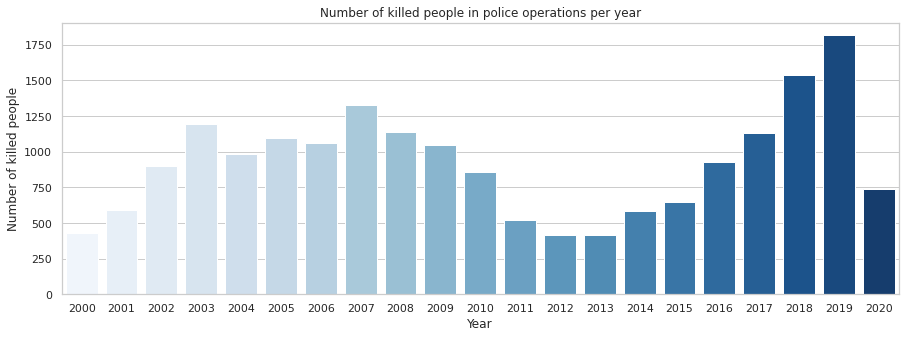

In [510]:
fig, ax = plt.subplots(figsize=(15, 5))

df_hom_por_interv_policial_year = pd.DataFrame(df_violence_rj.groupby("ano")["hom_por_interv_policial"].sum())

sns.barplot(x=df_hom_por_interv_policial_year.index, y="hom_por_interv_policial", data=df_hom_por_interv_policial_year,
             palette="Blues")

ax.set_title("Number of killed people in police operations per year")
ax.set_ylabel("Number of killed people")
ax.set_xlabel("Year")

#### *Police killing numbers in 2019*

On the first year of the governor Wilson Witzel on the administration of Rio de Janeiro, the state could observe a dramatical increase on the police killings numbers during operations:

*   In 2019, **1,814** people were killed by policemen
*   In average, **151** people were killed by policeman per month 
*   The month of July 2019 registered a record of deaths withing the year, totalling a **195 lost lifes** during a single month
*   In 2019, the number of killed people during police operations increased **15.44%** compared to previous year











In [517]:
print("Total of killed people in 2019: {}".format(df_violence_rj['2019-01-01':'2019-12-01'].hom_por_interv_policial.sum()))
print("Average of killed people per month in 2019: {}".format(df_violence_rj['2019-01-01':'2019-12-01'].hom_por_interv_policial.mean()))
print("Record of killed people whithin a month: {}".format(df_violence_rj['2019-01-01':'2019-12-01'].hom_por_interv_policial.max()))

Total of killed people in 2019: 1814.0
Average of killed people per month in 2019: 151.16666666666666
Record of killed people whithin a month: 195.0


In [500]:
total_hom_por_interv_policial_2019 = df_hom_por_interv_policial_year.loc[2019].hom_por_interv_policial
total_hom_por_interv_policial_2018 = df_hom_por_interv_policial_year.loc[2018].hom_por_interv_policial

hom_por_interv_policial_inc = (1 - total_hom_por_interv_policial_2018 / total_hom_por_interv_policial_2019) * 100

print("In 2019, the number of killed people during police operations increased {}% compared to 2018".format(
    hom_por_interv_policial_inc.round(2)))

In 2019, the number of killed people during police operations increased 15.44% compared to 2018


#### *Year of 2020*

This article is being written when the most recent security statistics from Rio de Janeiro published is until June 2020.

By having that in hands, let's compare the rates of 2020 until June with the same period within previous years.

We will filter our dataframe by using the following constraints:


*   `df_violence_rj.ano >= 2018`
*   `df_violence_rj.mes < 6`



In [355]:
df_deaths_by_agents_monthly = df_violence_rj[(df_violence_rj.ano >= 2018) & (df_violence_rj.mes < 6)]

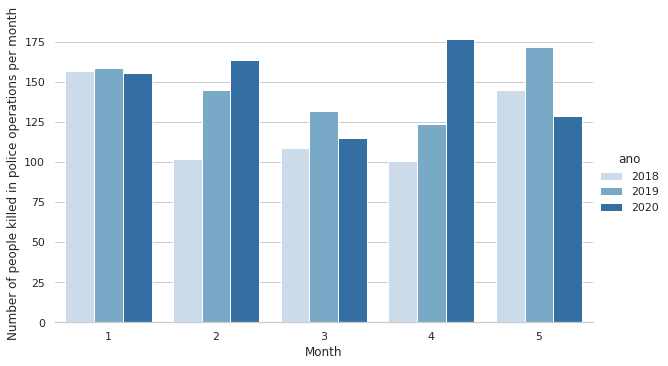

In [476]:
sns.set(style="whitegrid")

g= sns.catplot(x='mes', y='hom_por_interv_policial', hue='ano', data=df_deaths_by_agents_monthly, kind='bar',
               height=5, aspect=1.7, palette="Blues")

g.despine(left=True)
g.set_ylabels("Number of people killed in police operations per month")
g.set_xlabels("Month")

### *Does the violence really dropped?*

Officials say the approach from Mr Witzel has worked, citing a drop in violent crime. Now we are going to verify based on official published numbers if there was a significant drop on the violence since the **policy of confrontation approach** was implemented as part of administration strategy of Mr Witzel.

In order to analyze weather violence really dropped in Rio de Janeiro or not, the following attributes were choosed from the *dataset*:

*   `hom_doloso`: total of registered **muders** per month
*   `total_roubos`: total of registered **threats** per month
*   `total_furtos`: total of registered **robberies** per month

#### *Murders Rate*

On the line graph we can see the murders rate varying within the period since 2015. We can see it was already in place a descent movement going on. 

The variation of murders rate in between 2018/2019 was -23.63%, however this trend was already being observed since 2017.

Text(0, 0.5, 'Number of murder cases')

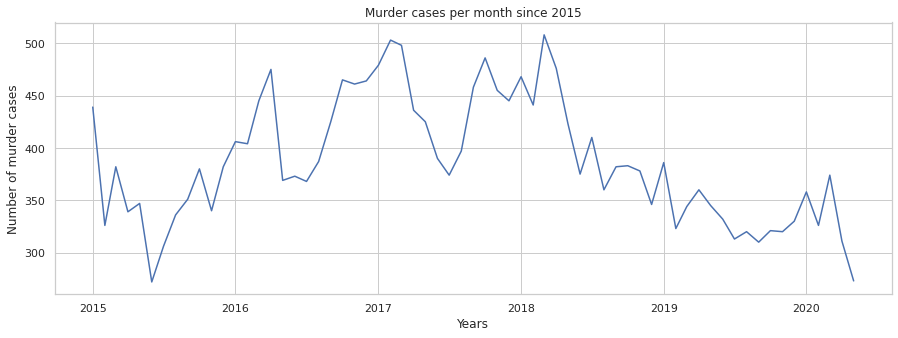

In [561]:
fig, ax = plt.subplots(figsize=(15, 5))

ax=sns.lineplot(x='date', y='hom_doloso' ,data=df_violence_rj['2015-01-01':])
ax.set_title("Murder cases per month since 2015")
ax.set_xlabel("Years")
ax.set_ylabel("Number of murder cases")

In [ ]:
# calculating the percentage variation of murders rate within 2018 
total_hom_doloso_2018 = df_violence_rj.loc[df_violence_rj['ano']==2018].hom_doloso.sum()
total_hom_doloso_2019 = df_violence_rj.loc[df_violence_rj['ano']==2019].hom_doloso.sum()

total_hom_doloso_inc = (1 - total_hom_doloso_2018 / total_hom_doloso_2019) * 100

print("Variation of murders rate in between 2018/2019: {}%".format(total_hom_doloso_inc.round(2)))

In [607]:
# calculating the percentage variation of murders rate between 2018 and 2019
total_hom_doloso_2018 = df_violence_rj.loc[df_violence_rj['ano']==2018].hom_doloso.sum()
total_hom_doloso_2019 = df_violence_rj.loc[df_violence_rj['ano']==2019].hom_doloso.sum()

total_hom_doloso_inc = (1 - total_hom_doloso_2018 / total_hom_doloso_2019) * 100

print("Variation of murders rate in between 2018/2019: {}%".format(total_hom_doloso_inc.round(2)))

Variation of murders rate in between 2018/2019: -23.63%


#### *Threats and Robbery Rates*

Since 2015, the threat and robbery rates have been varying over the years. 

The threat rate reached it's peak on the year of 2017, accounting 23,203 ocurrences within the same month. The robbery rate reached it's peak on the year of 2014, with 18,003 registed ocurrences in a single month.

During first year of Mr Witzel governament, it was observed a -16.2% decrease on threats rate compared with 2018. However, the robbery rates are still in a ascendent movement, with a increase of 6.89%.


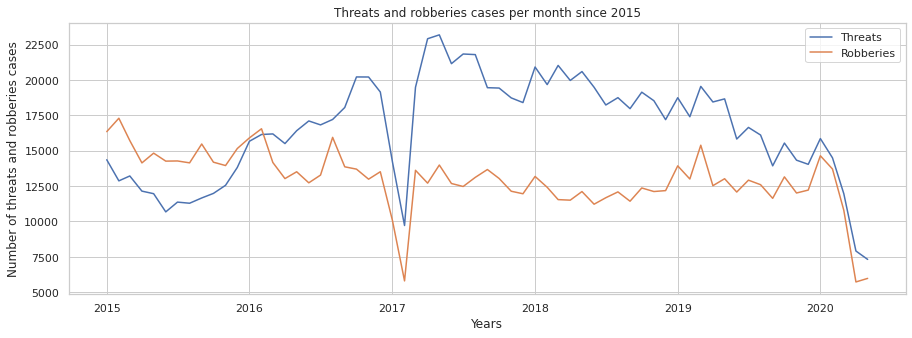

In [559]:
# plot line graph with values of threats and robberies
fig, ax = plt.subplots(figsize=(15, 5))

ax = sns.lineplot(x='date', y='total_roubos' ,data=df_violence_rj['2015-01-01':], label="Threats")
ax = sns.lineplot(x='date', y='total_furtos' ,data=df_violence_rj['2015-01-01':], label="Robberies")

ax.set_title("Threats and robberies cases per month since 2015")
ax.set_xlabel("Years")
ax.set_ylabel("Number of threats and robberies cases")
ax.legend()

In [555]:
# calculating the percentage variation of threats rate between 2018 and 2019
total_threats_2018 = df_violence_rj.loc[df_violence_rj['ano']==2018].total_roubos.sum()
total_threats_2019 = df_violence_rj.loc[df_violence_rj['ano']==2019].total_roubos.sum()

total_threats_inc = (1 - total_threats_2018 / total_threats_2019) * 100

print("Variation of threats rate in between 2018/2019: {}%".format(total_threats_inc.round(2)))

Variation of threats rate in between 2018/2019: -16.2%


In [556]:
# calculating the percentage variation of robbery rate between 2018 and 2019
total_robbery_2018 = df_violence_rj.loc[df_violence_rj['ano']==2018].total_furtos.sum()
total_robbery_2019 = df_violence_rj.loc[df_violence_rj['ano']==2019].total_furtos.sum()

total_robbery_inc = (1 - total_robbery_2018 / total_robbery_2019) * 100

print("Variation of robbery rate in between 2018/2019: {}%".format(total_robbery_inc.round(2)))

Variation of robbery rate in between 2018/2019: 6.89%


In [605]:
# getting dates when it was registered the peaks and botton values of threat and robbery
min_robb = df.total_furtos.min()
max_robb = df.total_furtos.max()
min_threats = df.total_roubos.min()
max_threats = df.total_roubos.max()

print("MIN threats on the period: {} ".format(min_threats))
print("MAX threats on the period: {} ".format(max_threats))
print("DATE lowest number of theats: {}".format(df[df['total_roubos']==min_threats].index[0]))
print("DATE highest number of theats: {}".format(df[df['total_roubos']==max_threats].index[0]))

print("MIN robberies on the period: {} ".format(min_robb))
print("MAX robberies on the period: {} ".format(max_robb))
print("DATE lowest number of robberies: {}".format(df[df['total_furtos']==min_robb].index[0]))
print("DATE highest number of robberies: {}".format(df[df['total_furtos']==max_robb].index[0]))

MIN threats on the period: 3261 
MAX threats on the period: 23203 
DATE lowest number of theats: 1991-02-01 00:00:00
DATE highest number of theats: 2017-05-01 00:00:00
MIN robberies on the period: 4691 
MAX robberies on the period: 18003 
DATE lowest number of robberies: 1995-11-01 00:00:00
DATE highest number of robberies: 2014-03-01 00:00:00


## Conclusion

Escreva suas conclusões e análises sobre os indicadores de violência do Rio de Janeiro...